<a href="https://colab.research.google.com/github/gusmaomarcos/machine-learning-avancada/blob/main/DeepLearning_Keras_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model

I/O

In [ ]:
#dataset = keras.datasets.fashion_mnist.load_data()
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

In [ ]:
identificacoes_treino.shape

(60000,)

In [ ]:
identificacoes_teste.shape

(10000,)

In [ ]:
identificacoes_treino.min(), identificacoes_treino.max()

(0, 9)

Exibição dos dados

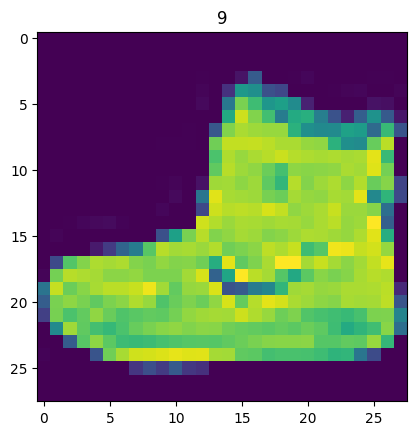

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

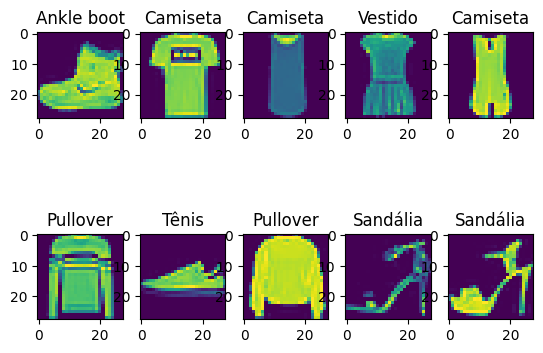

In [ ]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Ankle boot']

for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
plt.show()

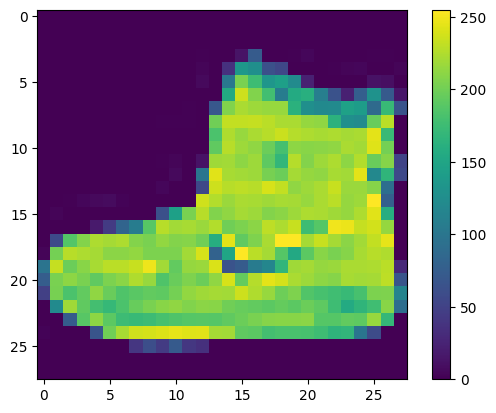

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.show()

Normalização

In [ ]:
imagens_treino = imagens_treino/float(255)
imagens_teste = imagens_teste/float(255)

Modelo

In [ ]:
modelo1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ])

In [ ]:
modelo1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mse'])
historico1 = modelo1.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 18s 10ms/step - loss: 0.5048 - accuracy: 0.8178 - mse: 27.7454 - val_loss: 0.4027 - val_accuracy: 0.8538 - val_mse: 27.3927
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3718 - accuracy: 0.8627 - mse: 27.7521 - val_loss: 0.3962 - val_accuracy: 0.8558 - val_mse: 27.3967
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3361 - accuracy: 0.8757 - mse: 27.7539 - val_loss: 0.3594 - val_accuracy: 0.8646 - val_mse: 27.3974
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3116 - accuracy: 0.8848 - mse: 27.7550 - val_loss: 0.3665 - val_accuracy: 0.8707 - val_mse: 27.3999
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2922 - accuracy: 0.8896 - mse: 27.7560 - val_loss: 0.3138 - val_accuracy: 0.8882 - val_mse: 27.4004


In [ ]:
testes = modelo1.predict(imagens_teste)
print(testes)
print(type(testes))

313/313 [==============================] - 1s 3ms/step
[[5.42276985e-06 5.54607198e-07 1.20166296e-05 ... 2.88614072e-02
  5.06378528e-05 9.66534913e-01]
 [2.79053825e-06 2.40881134e-11 9.91915226e-01 ... 1.05602922e-15
  2.99281100e-10 2.81733404e-12]
 [3.54949820e-10 9.99999940e-01 7.16399726e-12 ... 9.60635279e-22
  1.37857815e-11 1.33220258e-17]
 ...
 [1.90761196e-03 2.07566544e-07 3.22030646e-05 ... 9.28033899e-08
  9.97862935e-01 3.83220211e-08]
 [5.62502400e-09 9.99961555e-01 3.86949139e-10 ... 1.40946265e-14
  5.82425130e-09 6.35826504e-12]
 [1.63512013e-05 7.21443598e-08 3.03042071e-07 ... 1.10159768e-03
  5.81848835e-05 1.62298038e-05]]
<class 'numpy.ndarray'>


In [ ]:
print('Resultado do teste:' , np.argmax(testes[0]))
print('Número da imagem de teste:' , identificacoes_teste[0])
print('Resultado do teste:' , np.argmax(testes[24]))
print('Número da imagem de teste:' , identificacoes_teste[24])

Resultado do teste: 9
Número da imagem de teste: 9
Resultado do teste: 1
Número da imagem de teste: 1


In [ ]:
perda_teste, acurácia_teste, mse = modelo1.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', round(perda_teste, 4))
print('Acurácia do teste:', round(acurácia_teste, 4))
print('MSE do teste:', round(mse, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8815 - mse: 27.6850
Perda do teste: 0.3325
Acurácia do teste: 0.8815
MSE do teste: 27.685


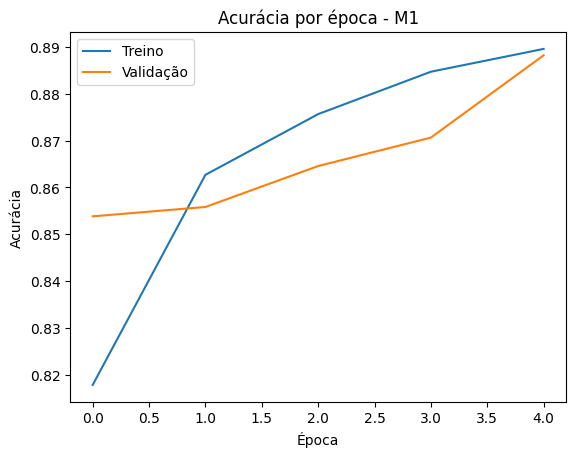

In [ ]:
plt.plot(historico1.history['accuracy'])
plt.plot(historico1.history['val_accuracy'])
plt.title('Acurácia por época - M1')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

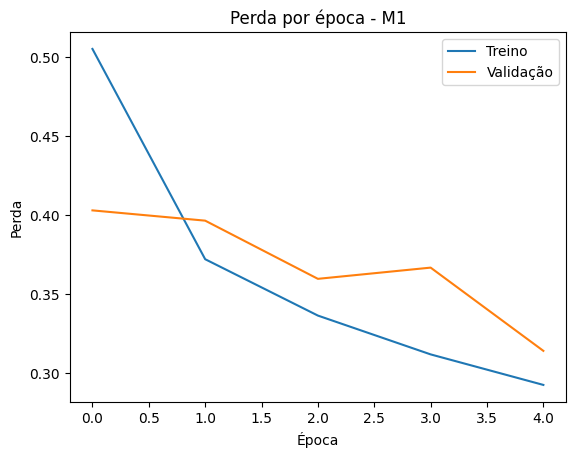

In [ ]:
plt.plot(historico1.history['loss'])
plt.plot(historico1.history['val_loss'])
plt.title('Perda por época - M1')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])
plt.show()

In [ ]:
modelo2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ])

In [ ]:
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'mse'])
historico2 = modelo2.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5408 - accuracy: 0.8081 - mse: 27.7437 - val_loss: 0.4313 - val_accuracy: 0.8373 - val_mse: 27.3945
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3943 - accuracy: 0.8565 - mse: 27.7509 - val_loss: 0.3704 - val_accuracy: 0.8658 - val_mse: 27.3975
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3520 - accuracy: 0.8717 - mse: 27.7530 - val_loss: 0.3351 - val_accuracy: 0.8779 - val_mse: 27.3964
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3272 - accuracy: 0.8803 - mse: 27.7541 - val_loss: 0.3384 - val_accuracy: 0.8739 - val_mse: 27.3996
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3096 - accuracy: 0.8855 - mse: 27.7550 - val_loss: 0.3408 - val_accuracy: 0.8767 - val_mse: 27.4006


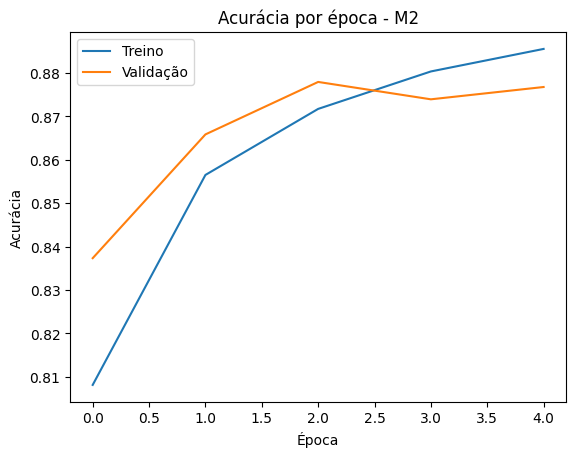

In [ ]:
plt.plot(historico2.history['accuracy'])
plt.plot(historico2.history['val_accuracy'])
plt.title('Acurácia por época - M2')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

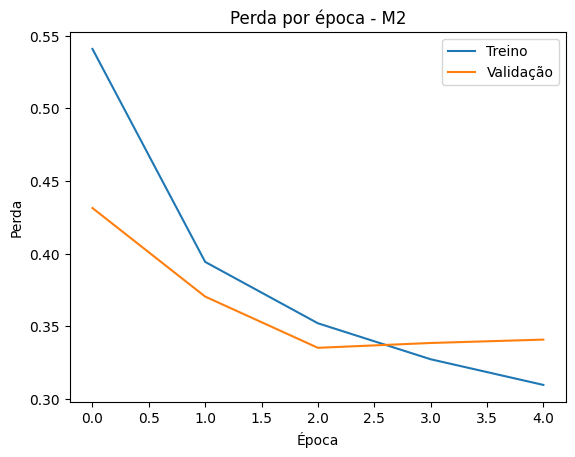

In [ ]:
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.title('Perda por época - M2')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])
plt.show()

Salvando

In [ ]:
modelo1.save('modelo1.h5')
modelo1_salvo = load_model('modelo1.h5')
modelo2.save('modelo2.h5')
modelo2_salvo = load_model('modelo2.h5')

In [ ]:
testes2 = modelo2.predict(imagens_teste)
print('Resultado do teste:' , np.argmax(testes2[0]))
print('Número da imagem de teste:' , identificacoes_teste[0])
print('Resultado do teste:' , np.argmax(testes2[24]))
print('Número da imagem de teste:' , identificacoes_teste[24])

313/313 [==============================] - 1s 3ms/step
Resultado do teste: 9
Número da imagem de teste: 9
Resultado do teste: 1
Número da imagem de teste: 1


In [ ]:
teste_modelo_salvo = modelo2_salvo.predict(imagens_teste)
print('Resultado do teste:' , np.argmax(teste_modelo_salvo[4]))
print('Número da imagem de teste:' , identificacoes_teste[4])

313/313 [==============================] - 1s 2ms/step
Resultado do teste: 6
Número da imagem de teste: 6
